In [21]:
import pandas as pd
#para poder vizualizar los datos
import matplotlib.pyplot as plt
#librería para predecir el tiempo (mes)
from statsmodels.tsa.arima.model import ARIMA
#librería para predecir la magnitud de los sismos
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Si las columnas están separadas por tabulaciones
df = pd.read_csv("F:\\POtato\\DATA-Analytics\\Sismos_CDMX\\Data\\SSNMX.csv", 
                 skiprows=4,  #omitir las primeras cuatro filas
                 skipfooter=7, #omitir las ultimas 7 filas
                 #sep=',',  #separador de columnas en caso de que no se separe
                 encoding='utf-8',
                 engine= 'python' #Necesario para que skipfooter funcione
                 )

In [16]:
df.tail(20)

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
521,2024-12-15,10:24:23,2.2,19.387,-99.172,2.5,"BENITO JUAREZ, CDMX",2024-12-15,16:24:23,verificado
522,2024-12-15,11:02:08,1.3,19.385,-99.169,2.0,"BENITO JUAREZ, CDMX",2024-12-15,17:02:08,verificado
523,2025-01-15,04:59:43,1.5,19.300,-99.197,4.3,"TLALPAN, CDMX",2025-01-15,10:59:43,verificado
524,2025-01-18,01:35:04,2.6,19.286,-99.263,2.3,"LA MAGDALENA CONTRERAS, CDMX",2025-01-18,07:35:04,verificado
525,2025-01-21,21:34:05,1.7,19.360,-99.175,1.0,"ÁLVARO OBREGON, CDMX",2025-01-22,03:34:05,verificado
526,2025-02-10,04:38:17,1.2,19.412,-99.224,2.0,"MIGUEL HIDALGO, CDMX",2025-02-10,10:38:17,verificado
527,2025-03-08,21:47:19,2.1,19.158,-98.973,12.1,"MILPA ALTA, CDMX",2025-03-09,03:47:19,verificado
528,2025-05-04,05:50:29,1.9,19.399,-99.180,1.0,"MIGUEL HIDALGO, CDMX",2025-05-04,11:50:29,verificado
529,2025-05-30,17:32:21,2.2,19.401,-99.208,2.0,"MIGUEL HIDALGO, CDMX",2025-05-30,23:32:21,verificado
530,2025-05-30,17:33:00,1.8,19.401,-99.219,1.0,"MIGUEL HIDALGO, CDMX",2025-05-30,23:33:00,verificado


In [ ]:
#verificamos si hay valores nulos y cuantos son en cada columna
df.isnull().sum() 

Fecha                         0
Hora                          0
Magnitud                      0
Latitud                       0
Longitud                      0
Profundidad                   0
Referencia de localizacion    0
Fecha UTC                     0
Hora UTC                      0
Estatus                       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       541 non-null    object 
 1   Hora                        541 non-null    object 
 2   Magnitud                    541 non-null    object 
 3   Latitud                     541 non-null    float64
 4   Longitud                    541 non-null    float64
 5   Profundidad                 541 non-null    float64
 6   Referencia de localizacion  541 non-null    object 
 7   Fecha UTC                   541 non-null    object 
 8   Hora UTC                    541 non-null    object 
 9   Estatus                     541 non-null    object 
dtypes: float64(3), object(7)
memory usage: 42.4+ KB


In [25]:
df['Magnitud'] = pd.to_numeric(df['Magnitud'], errors='coerce') #convertimos a numerico 
df= df.dropna(subset=['Magnitud']) #eliminamos lso valores NAN

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, 21 to 540
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       467 non-null    object 
 1   Hora                        467 non-null    object 
 2   Magnitud                    467 non-null    float64
 3   Latitud                     467 non-null    float64
 4   Longitud                    467 non-null    float64
 5   Profundidad                 467 non-null    float64
 6   Referencia de localizacion  467 non-null    object 
 7   Fecha UTC                   467 non-null    object 
 8   Hora UTC                    467 non-null    object 
 9   Estatus                     467 non-null    object 
dtypes: float64(4), object(6)
memory usage: 40.1+ KB


In [ ]:
import folium

#centro aproximado de CDMX
m = folium.Map(location=[19.4,-99.15], zoom_start=11)

#agregar puntos del dataframe
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitud'], row['Longitud']],
        radius= 3,
        popup= f"{row['Fecha']} - M{row['Magnitud']}- {row['Referencia de localizacion']}",
        color = 'red' if row['Magnitud'] >= 2 else 'blue',
        fill= True,
        fill_opacity= 0.7,
    ).add_to(m)
m.save('F:\\POtato\\DATA-Analytics\\Sismos_CDMX\\Data\\sismos_cdmx.html')

In [ ]:
df.to_csv('F:\\POtato\\DATA-Analytics\\Sismos_CDMX\\Data\\sismos_cdmx_cleanData.csv', encoding='utf-8')

In [ ]:
df  = pd.read_csv('F:\\POtato\\DATA-Analytics\\Sismos_CDMX\\Data\\sismos_cdmx_cleanData.csv', encoding='utf-8')
df.head()

,Unnamed: 0,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,21,1980-02-19,22:23:09,3.5,19.40,-99.21,1.0,"1 km al OESTE de V ALVARO OBREGON, CDMX",1980-02-20,04:23:09,revisado
1,29,1981-02-04,07:40:26,3.5,19.39,-99.20,2.0,"1 km al SUR de V ALVARO OBREGON, CDMX",1981-02-04,13:40:26,revisado
2,39,1981-08-08,14:39:54,2.7,19.50,-99.20,3.0,"3 km al NOROESTE de AZCAPOTZALCO, CDMX",1981-08-08,20:39:54,revisado
3,42,1981-10-24,18:25:04,2.5,19.20,-99.20,2.0,"2 km al SURESTE de S MIGUEL AJUSCO, CDMX",1981-10-25,00:25:04,revisado
4,43,1981-12-26,01:08:56,1.6,19.30,-99.20,5.0,"3 km al SURESTE de TLALPAN, CDMX",1981-12-26,07:08:56,revisado


In [18]:
#elimnamos columnas que no nos serán de utilidad
df.drop(columns=['Hora UTC', 'Fecha UTC','Unnamed: 0'], inplace=True)
df.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Estatus
0,1980-02-19,22:23:09,3.5,19.40,-99.21,1.0,"1 km al OESTE de V ALVARO OBREGON, CDMX",revisado
1,1981-02-04,07:40:26,3.5,19.39,-99.20,2.0,"1 km al SUR de V ALVARO OBREGON, CDMX",revisado
2,1981-08-08,14:39:54,2.7,19.50,-99.20,3.0,"3 km al NOROESTE de AZCAPOTZALCO, CDMX",revisado
3,1981-10-24,18:25:04,2.5,19.20,-99.20,2.0,"2 km al SURESTE de S MIGUEL AJUSCO, CDMX",revisado
4,1981-12-26,01:08:56,1.6,19.30,-99.20,5.0,"3 km al SURESTE de TLALPAN, CDMX",revisado


In [19]:
#verificamos los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       467 non-null    object 
 1   Hora                        467 non-null    object 
 2   Magnitud                    467 non-null    float64
 3   Latitud                     467 non-null    float64
 4   Longitud                    467 non-null    float64
 5   Profundidad                 467 non-null    float64
 6   Referencia de localizacion  467 non-null    object 
 7   Estatus                     467 non-null    object 
dtypes: float64(4), object(4)
memory usage: 29.3+ KB


In [ ]:
#modificamos los tipos de datos
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Hora'] = pd.to_datetime(df['Hora'], errors='coerce').dt.hour

#extraemos variables temporales
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day
df['Dia_semana'] = df['Fecha'].dt.weekday #tomará la posición del día en la semana (lunes, martes, miercoles, etc, y devolverá un numero)

#variables a usar para el modelo
ft = ['Año', 'Mes', 'Dia', 'Dia_semana', 'Hora', 'Latitud', 'Longitud', 'Profundidad']
df = df.dropna(subset=ft)

df.head()

C:\Users\Potato\AppData\Local\Temp\ipykernel_23032\2320128935.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hora'] = pd.to_datetime(df['Hora'], errors='coerce').dt.hour


,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Estatus,Año,Mes,Dia,Dia_semana
0,1980-02-19,22,3.5,19.40,-99.21,1.0,"1 km al OESTE de V ALVARO OBREGON, CDMX",revisado,1980,2,19,1
1,1981-02-04,7,3.5,19.39,-99.20,2.0,"1 km al SUR de V ALVARO OBREGON, CDMX",revisado,1981,2,4,2
2,1981-08-08,14,2.7,19.50,-99.20,3.0,"3 km al NOROESTE de AZCAPOTZALCO, CDMX",revisado,1981,8,8,5
3,1981-10-24,18,2.5,19.20,-99.20,2.0,"2 km al SURESTE de S MIGUEL AJUSCO, CDMX",revisado,1981,10,24,5
4,1981-12-26,1,1.6,19.30,-99.20,5.0,"3 km al SURESTE de TLALPAN, CDMX",revisado,1981,12,26,5


In [51]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib 
#Realizamos un modelo para predecir  la magnitud del sismo

x = df[ft]
y = df['Magnitud']

#division de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

#PIPELINE, escalado + modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

#entrenamos 
pipeline.fit(x_train, y_train)
#Predecimos
y_pred = pipeline.predict(x_test)


#sirve para validar el modelo
print("R² score: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE',mean_absolute_error(y_test, y_pred))

# descargamos las librerías necesarias para guardar el modelo para su posterior uso

joblib.dump(pipeline, 'F:\\POtato\\DATA-Analytics\\Sismos_CDMX\\Data\\modelo_sismos.pkl')

R² score:  0.6126369641557314
RMSE:  0.47514204668604837
MAE 0.38490174887169565


['F:\\POtato\\DATA-Analytics\\Sismos_CDMX\\Data\\modelo_sismos.pkl']

¿Cómo saber si el modelo es bueno?

| Métrica | Bueno | Aceptable | Malo  |
| ------- | ----- | --------- | ----- |
| R²      | ≥ 0.8 | 0.5–0.79  | < 0.5 |
| RMSE    | < 0.3 | 0.3–0.6   | > 0.6 |
| MAE     | < 0.2 | 0.2–0.4   | > 0.4 |


In [52]:
#prediccion de nuevos eventos hipoteticos

nuevo_ev= pd.DataFrame([{
    'Año': 2025,
    'Mes': 7,
    'Dia': 1,
    'Dia_semana': 1,
    'Hora':10,
    'Latitud': 19.36,
    'Longitud': -99.2,
    'Profundidad': 1.0
}])

magnitud = pipeline.predict(nuevo_ev)
print('Magnitud estimada', magnitud[0])

Magnitud estimada 1.8794500000000007


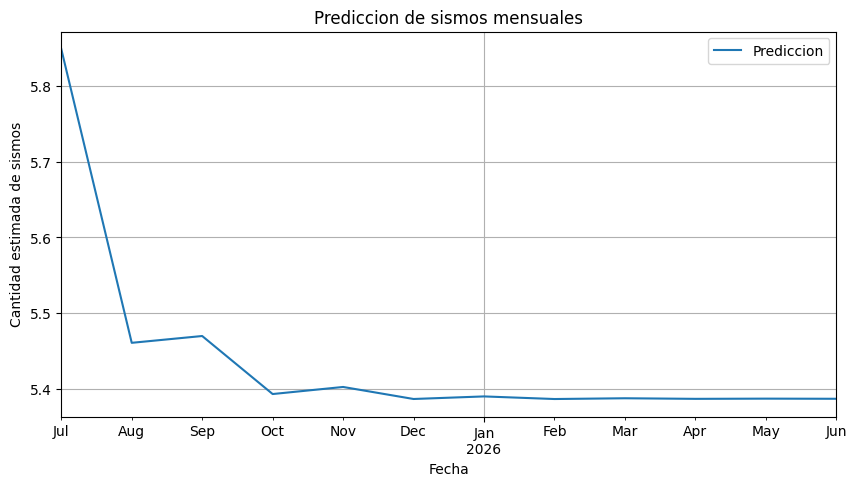

In [44]:
#entrenamos el modelo ARIMA (p,d,q)
#agrupamos por mes y cuenta de eventos
df_mensual = df.set_index('Fecha').resample('ME').size().rename('Conteo_sismos')
modelos = ARIMA(df_mensual, order=(2,1,2))
resultado = modelos.fit()

#Predecir los proximos 12 meses
pred = resultado.forecast(steps=12)

#mostrar
fechas_pred = pd.date_range(start=df_mensual.index[-1] + pd.offsets.MonthEnd(1), periods=12, freq='ME')
df_pred = pd.DataFrame({'Prediccion': pred}, index=fechas_pred)
df_pred.plot(title='Prediccion de sismos mensuales', figsize=(10,5))
plt.xlabel('Fecha')
plt.ylabel('Cantidad estimada de sismos')
plt.grid(True)
plt.show()